In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# **Degree Distribution**

The degree of a node in an undirected graph is the number of neighbors it has. The **degree distribution** of a graph is the probability distribution of the degrees over the entire network. The degree distribution of a degree $k$ is:

$P(k) = {{n_k}\over{n}}$

where 
* $n_k$ is the number of nodes with a degree of $k$
* $n$ is the total number of nodes in the network



Plotting the degree distribution or the following graph:

<img src="../assets/undirected_graph.png" width=300px>

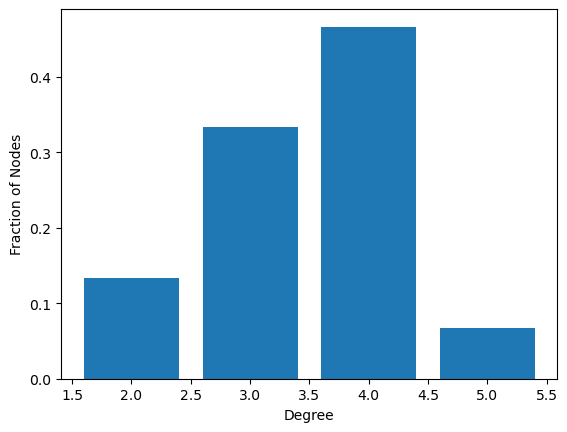

In [5]:
G = nx.read_adjlist(
    '../assets/undirected_graph.txt', 
    nodetype=str,
    create_using=nx.Graph()
)

degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [
    list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) 
    for i in degree_values
]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

# **In-Degree Distributions**

The in-degree of a node in a directed graph is the number of in-links it has. The **in-degree distribution** of a graph is:

$P_{in}(k) = {{in_k}\over{n}}$

where 
* $in_k$ is the number of nodes with a in-degree of $k$
* $n$ is the total number of nodes in the network



Plotting the degree distribution or the following graph:

<img src="../assets/directed_graph.png" width=300px>

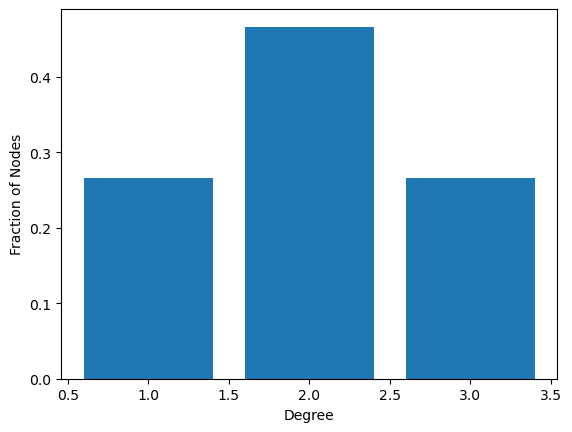

In [7]:
G = nx.read_adjlist(
    '../assets/directed_graph.txt', 
    nodetype=str,
    create_using=nx.DiGraph()
)

degrees = dict(G.in_degree())
degree_values = sorted(set(degrees.values()))
histogram = [
    list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) 
    for i in degree_values
]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In power law degree distributions, most of the nodes have a very small degrees
but a few nodes accumulate a very large degree. So one of the questions to ask when we see something like this is, what could explain this property that we observed happening in many different networks? And the way we try to answer this question is by coming up with models that generate networks that make a few assumptions about how these networks get formed and then they give rise to whatever properties we observed.

So in this case the question would be, can we come up with a model that
generates a network that has power law like degree distribution?

One of the models that achieves this property is called a **preferential
attachment model**

# **Preferential Attachment Model**

* Start with two nodes connected by an edge.
* At each time step, add a new node with an edge connecting it to an existing node.
* Choose the node to connect to at random with probability proportional to each node's degree.
* The probability of connecting to a node $u$ of degree $k$ is ${k_u}\over{\sum_j k_j}$

As the number of noes increases, the degree distribution of the network under the preferential attachment model approaches the power law $P(k) = Ck^{-3}$ with constant $C$.

The preferential attachment model produces networks with degree distributions similar to real networks.

In networkx, use the function Barabbas Albert graph which is named after
the researchers that came up with this model with input primers. The first parameter is the number of nodes and the second is the number of new nodes that an arriving node would attach to. 

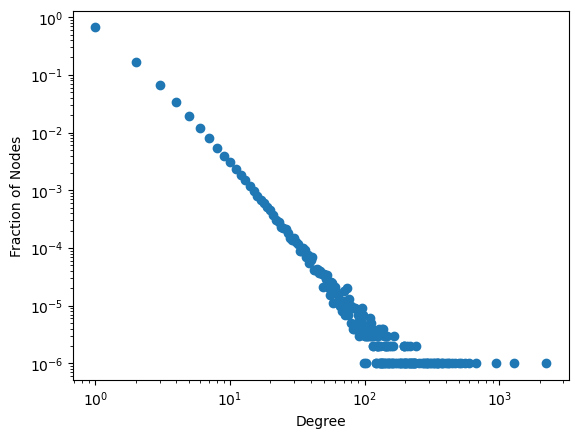

In [8]:
G = nx.barabasi_albert_graph(1000000, 1)

degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [
    list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) 
    for i in degree_values
]

plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()